In [103]:
#importing all the required libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

##Flight Price Dataset

In [104]:
df=pd.read_excel('/flight_price.xlsx')

In [105]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


We can see that the dataset needs some cleaning, columns like Arrival_Time, Duration, Total_Stops are not clean. And also all the columns are object datatype.

## Data Cleaning


Starting with dropping duplicate and null rows from the dataset

In [107]:
df.drop_duplicates(inplace = True)
df.dropna(inplace= True)


For further cleaning, let's begin by seperating date, month, and year from the Date_of_Journey column

In [108]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]
df.drop('Date_of_Journey', axis = 1, inplace = True)

Next, let's seperate arrival and teparture time in hours and minutes

In [109]:
df['Dep_hour']= df['Dep_Time'].str.split(':').str[0]
df['Dep_mins']= df['Dep_Time'].str.split(':').str[1]

df.drop('Dep_Time', axis = 1, inplace = True)

df['Arrival_hour'] = df['Arrival_Time'].str.split(':').str[0]
df['Arrival_mins'] = df['Arrival_Time'].str.split(':').str[1]
df['Arrival_mins'] = df['Arrival_mins'].str.split(' ').str[0] #to remove the date part from the mins section

df.drop('Arrival_Time', axis = 1, inplace = True)


In [110]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_mins,Arrival_hour,Arrival_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,03,2019,22,20,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,05,2019,05,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,06,2019,09,25,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,05,2019,18,05,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,01,03,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,04,2019,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,04,2019,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,04,2019,08,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,01,03,2019,11,30,14,10


Next, let's clean the duration column and convert this into mins only.


In [111]:
def duration_to_mins(duration):
  total_mins = 0
  for i in duration.split():
    if 'h' in i:
      total_mins += int(i.replace('h', ''))*60
    if 'm' in i:
      total_mins += int(i.replace('m', ''))
  return total_mins




In [112]:
df['Duration'] = df['Duration'].apply(duration_to_mins)

In [113]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_mins,Arrival_hour,Arrival_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,03,2019,22,20,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,05,2019,05,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,06,2019,09,25,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,05,2019,18,05,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,01,03,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,150,non-stop,No info,4107,9,04,2019,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,155,non-stop,No info,4145,27,04,2019,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,180,non-stop,No info,7229,27,04,2019,08,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,160,non-stop,No info,12648,01,03,2019,11,30,14,10


We can see that there are a few categorical columns that needs to be converted into numerical data.


In [114]:
df['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Starting with the airlines column, we can see that the dataset has only these airlines and we can represent these in numerical format.

Jet Airways and Jet Airways Business - 0

IndiGo - 1

Air India - 2

Multiple carriers and Multiple carriers Premium economy - 3

SpiceJet - 4

Vistara and Vistara Premium economy - 5

GoAir - 6

Air Asia - 7

Trujet - 8


In [115]:
df['Airline']=df['Airline'].map({'Jet Airways':0, 'IndiGo':1, 'Air India':2, 'Multiple carriers':3, 'SpiceJet':4, 'Vistara':5,
                                 'GoAir':6, 'Air Asia':7,'Multiple carriers Premium economy':3, 'Jet Airways Business':0, 'Vistara Premium economy':5, 'Trujet':8})


Similarly for source and Destination

In [116]:
df['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [117]:
df['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

Assigning values as -

Delhi - 0

New Delhi - 1

Kolkata - 2

Banglore - 3

Mumbai - 4

Chennai - 5

Hyderabad - 6

Cochin - 7

In [118]:
d = {'Delhi': 0, 'New Delhi': 1, 'Kolkata': 2, 'Banglore': 3, 'Mumbai': 4, 'Chennai': 5, 'Hyderabad': 6, 'Cochin': 7 }

In [119]:
df['Source'] =  df['Source'].map(d)
df['Destination'] = df['Destination'].map(d)

In [120]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

non-stop - 0

1 stop - 1

2 stops - 2

3 stops - 3

4 stops - 4

nan - 1

In [121]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4, 'nan':1})

In [122]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_mins,Arrival_hour,Arrival_mins
0,1,3,1,BLR → DEL,170,0,No info,3897,24,03,2019,22,20,01,10
1,2,2,3,CCU → IXR → BBI → BLR,445,2,No info,7662,1,05,2019,05,50,13,15
2,0,0,7,DEL → LKO → BOM → COK,1140,2,No info,13882,9,06,2019,09,25,04,25
3,1,2,3,CCU → NAG → BLR,325,1,No info,6218,12,05,2019,18,05,23,30
4,1,3,1,BLR → NAG → DEL,285,1,No info,13302,01,03,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,7,2,3,CCU → BLR,150,0,No info,4107,9,04,2019,19,55,22,25
10679,2,2,3,CCU → BLR,155,0,No info,4145,27,04,2019,20,45,23,20
10680,0,3,0,BLR → DEL,180,0,No info,7229,27,04,2019,08,20,11,20
10681,5,3,1,BLR → DEL,160,0,No info,12648,01,03,2019,11,30,14,10


I dont think that we need columns like Route and Additional_Info, I'm going to drop these and finally change the datatypes as per requirements.


In [123]:
df = df.drop(['Route', 'Additional_Info'], axis = 1)


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       10462 non-null  int64 
 1   Source        10462 non-null  int64 
 2   Destination   10462 non-null  int64 
 3   Duration      10462 non-null  int64 
 4   Total_Stops   10462 non-null  int64 
 5   Price         10462 non-null  int64 
 6   Date          10462 non-null  object
 7   Month         10462 non-null  object
 8   Year          10462 non-null  object
 9   Dep_hour      10462 non-null  object
 10  Dep_mins      10462 non-null  object
 11  Arrival_hour  10462 non-null  object
 12  Arrival_mins  10462 non-null  object
dtypes: int64(6), object(7)
memory usage: 1.1+ MB


In [125]:
df[['Date', 'Month', 'Year', 'Dep_hour', 'Dep_mins', 'Arrival_hour', 'Arrival_mins']]=df[['Date', 'Month', 'Year', 'Dep_hour', 'Dep_mins', 'Arrival_hour', 'Arrival_mins']].astype(int)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Airline       10462 non-null  int64
 1   Source        10462 non-null  int64
 2   Destination   10462 non-null  int64
 3   Duration      10462 non-null  int64
 4   Total_Stops   10462 non-null  int64
 5   Price         10462 non-null  int64
 6   Date          10462 non-null  int64
 7   Month         10462 non-null  int64
 8   Year          10462 non-null  int64
 9   Dep_hour      10462 non-null  int64
 10  Dep_mins      10462 non-null  int64
 11  Arrival_hour  10462 non-null  int64
 12  Arrival_mins  10462 non-null  int64
dtypes: int64(13)
memory usage: 1.1 MB


In [127]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,Date,Month,Year,Dep_hour,Dep_mins,Arrival_hour,Arrival_mins
0,1,3,1,170,0,3897,24,3,2019,22,20,1,10
1,2,2,3,445,2,7662,1,5,2019,5,50,13,15
2,0,0,7,1140,2,13882,9,6,2019,9,25,4,25
3,1,2,3,325,1,6218,12,5,2019,18,5,23,30
4,1,3,1,285,1,13302,1,3,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,7,2,3,150,0,4107,9,4,2019,19,55,22,25
10679,2,2,3,155,0,4145,27,4,2019,20,45,23,20
10680,0,3,0,180,0,7229,27,4,2019,8,20,11,20
10681,5,3,1,160,0,12648,1,3,2019,11,30,14,10


In [128]:
df.shape    #This is the dimention of our dataset after  cleaning the data

(10462, 13)

##Distribution of Flight Prices

In [129]:
price_range = max(df['Price']) - min(df['Price'])
price_range   #This is the price range for all the flights in the dataset

77753

In [130]:
df['Price'].describe()

count    10462.000000
mean      9026.790289
std       4624.849541
min       1759.000000
25%       5224.000000
50%       8266.000000
75%      12344.750000
max      79512.000000
Name: Price, dtype: float64

The price ranges between 1759 to 79512, with a mean of 9026 and standard deviation of 4624.84.

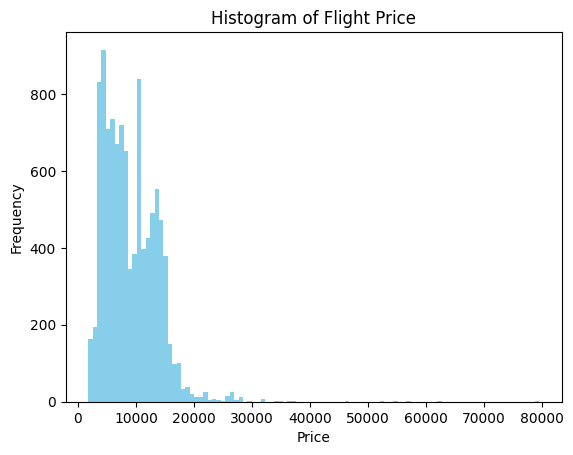

In [131]:
#Price Distribution graph
plt.hist(df['Price'], bins=int(np.sqrt(len(df['Price']))), color = 'skyblue')
plt.title("Histogram of Flight Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

It is clear from the histogram that around 75% of data lies below 12500 and there are a few flights which are either the outliers or charging a lot.

##Flight Prices by Airlines




In [132]:
#Avg prices by airlines data
average_prices = df.groupby('Airline')['Price'].mean().sort_values()
average_prices

Airline
8     4140.000000
4     4335.841718
7     5590.260188
1     5668.469897
6     5861.056701
5     7808.596674
2     9556.608028
3    10908.228288
0    11674.724771
Name: Price, dtype: float64

<ipython-input-133-86d9f7b3e108>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Airline', y='Price', data=df, palette='pastel')


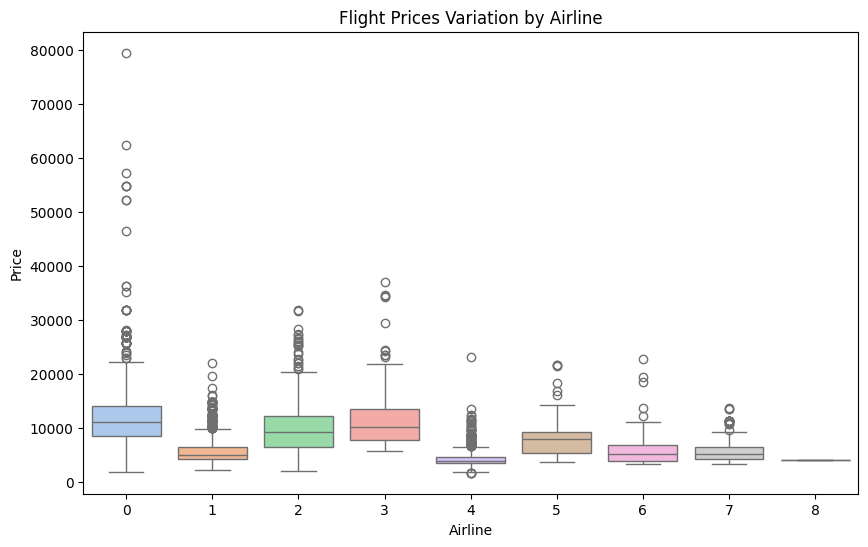

In [133]:
#Flight Price - Airlines Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Airline', y='Price', data=df, palette='pastel')
plt.title("Flight Prices Variation by Airline")
plt.xlabel("Airline")
plt.ylabel("Price")
plt.show()

On an average Jet Airways and Jet Airways Business charges the most and Trujet and Spicejet charges the least to the customers for their services.

Also, the price for Jet airways vary a lot as its range varies a lot and we can see a lot of outliers for this airline.

##Outliers



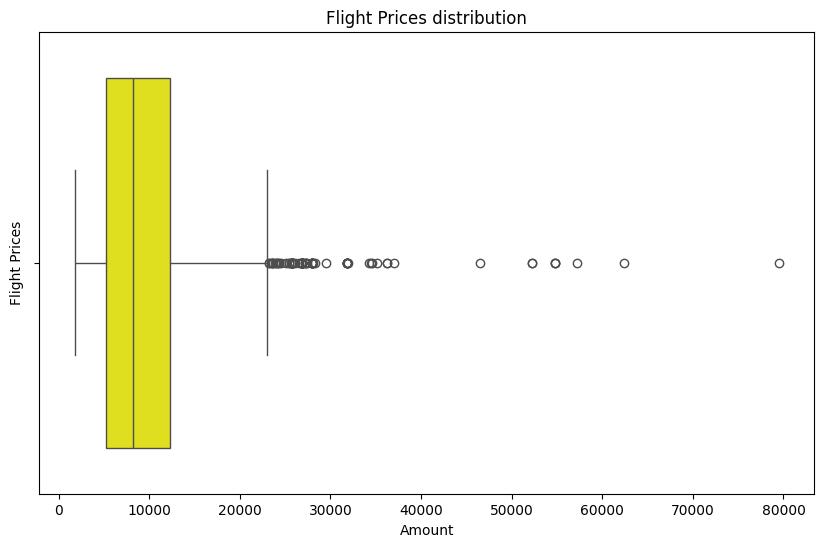

In [134]:
# Flight Price Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price', data=df, color='yellow')
plt.title("Flight Prices distribution")
plt.xlabel("Amount")
plt.ylabel("Flight Prices")
plt.show()

From the above boxplot, we can see a number of outliers for prices in the dataset. We can see a lot of data points on the right side of the right whisker of the box plot. These outliers can play a significant role in the statistics of the data, They can affect the mean, i.e. the central tendency of the dataset.

While we were describing the distribution of the price, we saw that there was a significant difference in the values of the mean(9026.790289) and the median(8266) which is the result of the outliers.

If these outliers are not treated in advance these can later affect and impact the results of our models in machine learning.


##Analyzing the Flight Price dataset to identify the peak travel seasons.

In [135]:
#Flights by month data
month_flights = df['Price'].groupby(by = df['Month']).count()
month_flights


Month
3    2678
4    1078
5    3395
6    3311
Name: Price, dtype: int64

We can see that the dataset comprises of data for only 4 months, and of these months, may and june are the months in which most number of tickets were booked. Stating that these 2 months are the peak travel seasons.


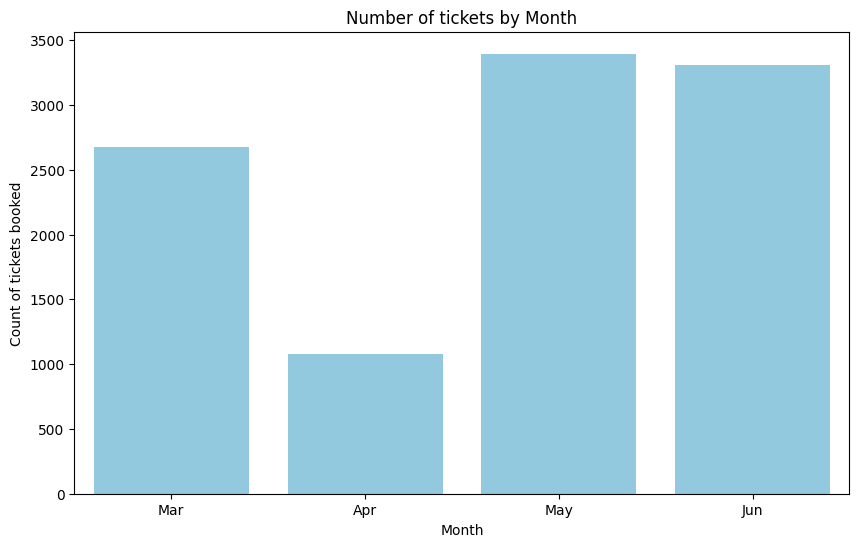

In [136]:
#Flights by months plot
plt.figure(figsize=(10, 6))
sns.barplot(x=month_flights.index, y=month_flights.values, color='skyblue')
plt.title("Number of tickets by Month")
plt.xlabel("Month")
plt.ylabel("Count of tickets booked")
plt.xticks(range(0, 4), ['Mar', 'Apr', 'May', 'Jun'])
plt.show()

Let's see if the price of the flight support this finding or not.


In [137]:
#Avg price - Month data
monthly_flight_avg_price = df['Price'].groupby(by = df['Month']).mean()
monthly_flight_avg_price

Month
3    10695.397311
4     5766.545455
5     9029.239764
6     8736.152522
Name: Price, dtype: float64

We can see that the average price of a flight increases in the month of may and june which is completely based on the fact that the flight prices increases in the peak seasons. Hence, supporting our findings from the upper analysis.

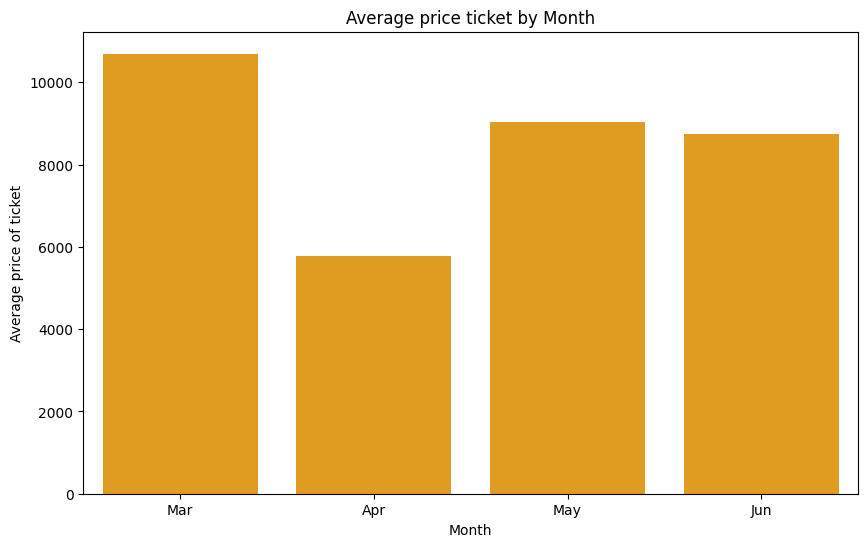

In [138]:
#Average Price - Month plot
plt.figure(figsize=(10, 6))
sns.barplot(x =monthly_flight_avg_price.index, y = monthly_flight_avg_price.values, color = 'orange' )
plt.title("Average price ticket by Month")
plt.xlabel("Month")
plt.ylabel("Average price of ticket")
plt.xticks(range(0, 4), ['Mar', 'Apr', 'May', 'Jun'])
plt.show()

We have seen in the boxplot above, how flight prices are affected with respect to the airlines, which airlines are the most expensive one and which offers affordable services.

We also saw a pattern between peak seasons and the prices. Months in the peak season results in the increase of the prices.


Now let's see how destination affects the prices.

In [151]:
#Price by Destination
df['Price'].groupby(by = df['Destination']).mean()


Destination
0     5143.918577
1    12007.421225
2     4789.892388
3     9143.083566
6     5059.708752
7    10461.600690
Name: Price, dtype: float64

In [152]:
#City names
d

{'Delhi': 0,
 'New Delhi': 1,
 'Kolkata': 2,
 'Banglore': 3,
 'Mumbai': 4,
 'Chennai': 5,
 'Hyderabad': 6,
 'Cochin': 7}

We can see that flights going to capital city 'New Delhi' are the most expensive ones, where as flights towards other cities like Kolkata, Hyderabad are quite cheaper.

<ipython-input-148-8575c6ed4c5b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Destination', y='Price', data=df, palette='muted')


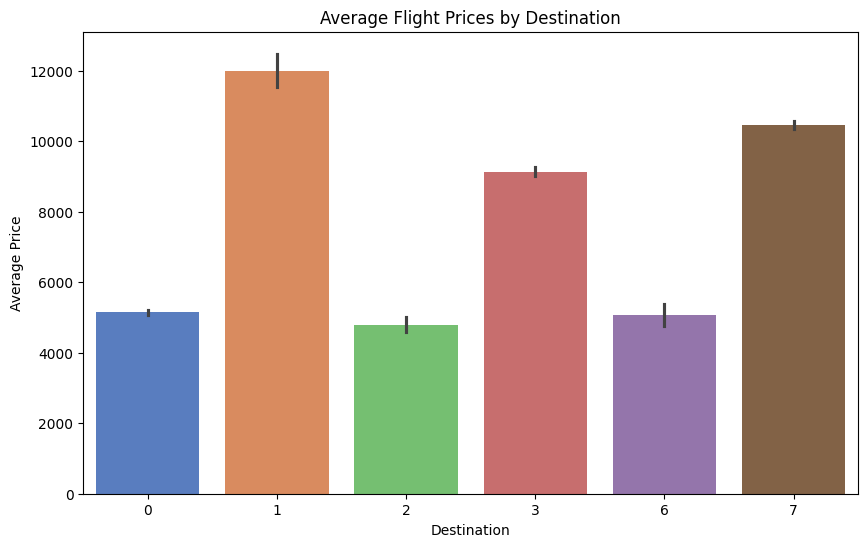

In [148]:
#Average price - Destination Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Destination', y='Price', data=df, palette='muted')
plt.title("Average Flight Prices by Destination")
plt.xlabel("Destination")
plt.ylabel("Average Price")
plt.show()

In [155]:
# Flight Prices - Stops data
mean_prices_by_stops = df['Price'].groupby(by= df['Total_Stops']).mean()
mean_prices_by_stops

Total_Stops
0     5018.506763
1    10594.123556
2    12761.099393
3    13260.674419
4    17686.000000
Name: Price, dtype: float64

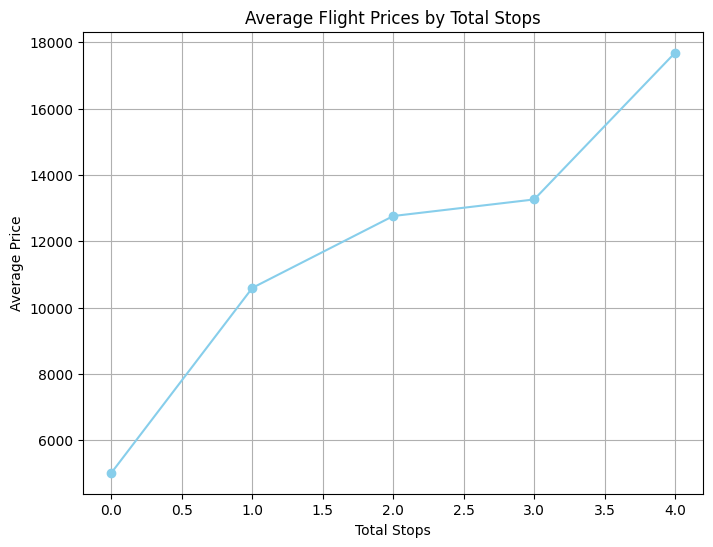

In [159]:
# Flight Prices - Stops plot
plt.figure(figsize=(8, 6))
plt.plot(mean_prices_by_stops.index, mean_prices_by_stops.values, marker='o', color='skyblue', linestyle='-')
plt.title("Average Flight Prices by Total Stops")
plt.xlabel("Total Stops")
plt.ylabel("Average Price")
plt.grid(True)
plt.show()

The data suggests that the more the number of stops in the flights the more is the price, showing a direct relation between number of stops and aveage price.

##Factors Affecting Flight Price

We can show how all the feature are affecting the price of the flight using the heat maps. The heat map finds correlation matrix for the dataset, which includes how one feature is affected by other in the dataset.

Here we don't want all the features as they are not important considering price.

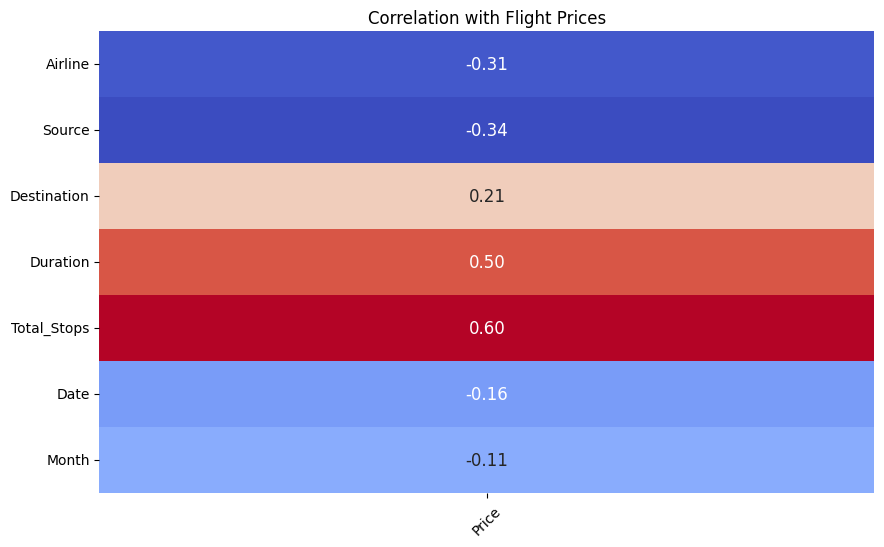

In [164]:
corr_matrix = df.corr()

# Filter the correlation matrix to include only correlations with the Price
price_correlation = corr_matrix['Price'].drop(['Price','Year', 'Arrival_hour', 'Arrival_mins', 'Dep_hour','Dep_mins' ])  # Drop the unwanted rows

plt.figure(figsize=(10, 6))
sns.heatmap(price_correlation.to_frame(), cmap='coolwarm', annot=True, fmt=".2f", annot_kws={"size": 12}, cbar=False)
plt.title('Correlation with Flight Prices')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

We can see that Total stops relates the most positively to the prices, while on the other hand there are features like source and destination which affects negatively as there are a fews places where the prices are significantly less as per the other cities.

In this notebook I went through the whole cycle of analysing a Flight's price datase. Starting with loading the dataset, then cleaning and finally answering many important questions with the help of visualizations that can be used by different teams of the airlines company for data driven decisions.  